In [18]:
from game_old import *
from players_old import *
import time
import pandas as pd

In [8]:
gomoku = Gomoku()

# metrics
game_depth = []
win_rates = []
avg_game_times = []
all_avg_decision_times = []
all_avg_move_scores = []
all_move_counts = []
outcomes = []


depths = [1, 2]
for depth in depths:
    print("Depth: ", depth)
    wins = 0
    games_total_time = 0
    games = 3

    for game in range(games):
        print(f"Game: {game + 1}")
        
        reset_move_metrics()  # Reset move times before each game
        reset_score_metrics()
        
        # Timing for the match starts
        start_time = time.time()
        
        alpha_beta_agent = alpha_beta_player(depth=depth, evaluation_func=evaluate_game_state_improved)
        opponent = random_player
        
        winner = gomoku.play_game(alpha_beta_agent, opponent)
        
        # Timing for the match ends
        game_time = time.time() - start_time
        games_total_time += game_time
        
        if winner == 1:
            print("Winner is the alpha_beta_agent")
            wins += 1
        else:
            print("Winner is the opponent")
        print("")
        
        # Append metrics for this game
        game_depth.append(depth)
        avg_game_times.append(round(game_time, 2))
        all_avg_decision_times.append(get_average_decision_time())
        all_avg_move_scores.append(round(get_average_score(), 2))
        all_move_counts.append(get_player_move_times())
        outcomes.append(winner)
        
        print("")

    win_rate = wins / games
    win_rates.append(win_rate)

Depth:  1
Game: 1
. B . . . . . W . W . . . . . 
. . B . . . . . . . . . . . . 
. . . B . . . . . . . . . . . 
. . . . B . . . . . . W W . . 
. . . . . B . . . . . . . . . 
. . . . B . B . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . B B . . . . . . 
. . . . . . . . . B . . . . . 
. . . . . . . . . . . . . . . 
. . . . W . . . W W . W . . . 
. . . . . . . . . . . . W . . 
. W . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
Black wins!
Winner is the alpha_beta_agent


Game: 2
. B . . . . . . . . . . . . . 
. . B . . . . . W . . . . . . 
. . . B . . . . . . . . . . . 
. . . . B . . . . . . . . . . 
. . . . . B . . W . . . . . . 
. . . . B . . . . . . . . . . 
. . . . . W . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . W . 
. . . . . . . . . . . . . . . 
. W W . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 

In [9]:
print("game_depth:", game_depth)
print("all_move_counts:", all_move_counts)
print("all_avg_decision_times:", all_avg_decision_times)
print("all_avg_move_scores:", all_avg_move_scores)
print("avg_game_times:", avg_game_times)
print("outcomes:", outcomes)

game_depth: [1, 1, 1, 2, 2, 2]
all_move_counts: [11, 7, 12, 6, 8, 6]
all_avg_decision_times: [0.55, 0.5, 0.56, 7.01, 8.79, 7.14]
all_avg_move_scores: [5.5, 3.83, 5.95, 2.0, 2.86, 2.0]
avg_game_times: [5.54, 3.02, 6.14, 35.04, 61.5, 35.7]
outcomes: [1, 1, 1, 1, 1, 1]


In [20]:
analysis = pd.DataFrame({"game_depth": game_depth,
                         "move_counts": all_move_counts,
                         "avg_decision_times": all_avg_decision_times,
                         "avg_move_scores": all_avg_move_scores,
                         "avg_game_times": avg_game_times,
                         "outcome": outcomes})

analysis.to_csv("agent_metrics.csv", index=False)
analysis.head()

,game_depth,move_counts,avg_decision_times,avg_move_scores,avg_game_times,outcome
0,1,11,0.55,5.50,5.54,1
1,1,7,0.50,3.83,3.02,1
2,1,12,0.56,5.95,6.14,1
3,2,6,7.01,2.00,35.04,1
4,2,8,8.79,2.86,61.50,1


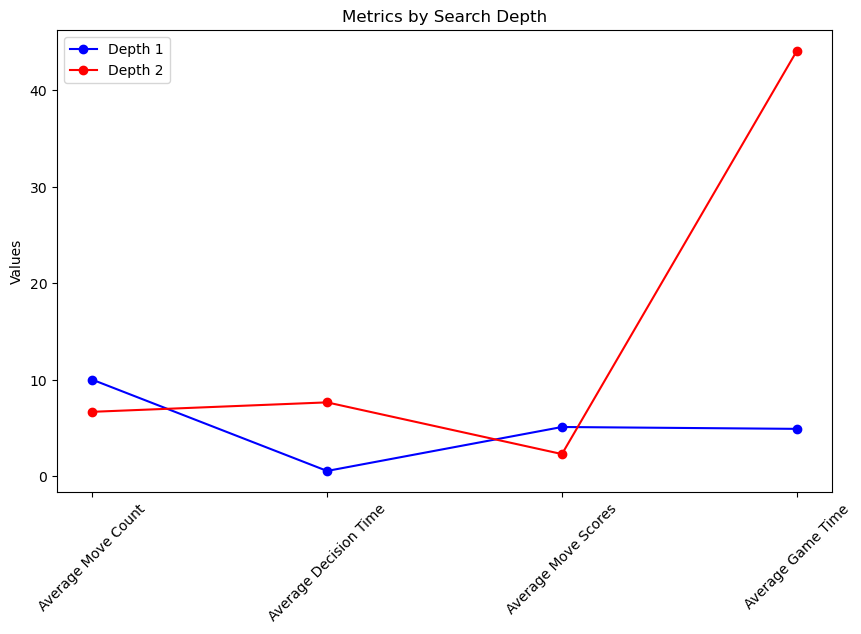

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
metrics_labels = ['Average Move Count', 'Average Decision Time', 'Average Move Scores', 'Average Game Time']
depth_1_values = [10.0, 0.5366666666666667, 5.093333333333334, 4.8999999999999995]
depth_2_values = [6.666666666666667, 7.646666666666666, 2.2866666666666666, 44.080000000000005]

# X locations for the groups
ind = np.arange(len(metrics_labels))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
line1 = ax.plot(ind, depth_1_values, color='blue', marker='o', label='Depth 1')
line2 = ax.plot(ind, depth_2_values, color='red', marker='o', label='Depth 2')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Metrics by Search Depth')
ax.set_xticks(ind)
ax.set_xticklabels(metrics_labels)
ax.legend()

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

plt.show()


In [ ]:
# gomoku = Gomoku()

# # Players
# simple_alpha_beta_player_2 = alpha_beta_player(depth=2, evaluation_func=get_score)
# improved_alpha_beta_player_2 = alpha_beta_player(depth=2, evaluation_func=evaluate_game_state_improved)
# improved_alpha_beta_player_3 = alpha_beta_player(depth=3, evaluation_func=evaluate_game_state_improved)


# result = gomoku.play_game(human_player, random_player)

In [ ]:
# result

### AI Vs. AI

In [ ]:
# gomoku = Gomoku()

# depths = [1, 2, 3]
# win_rates = []
# decision_times = []

# for depth in depths:
#     print("Depth: ", depth)
#     wins = 0
#     total_time = 0
#     games = 3

#     for game in range(games):
#         print("Game: ", game + 1)
#         start_time = time.time()
        
# #         alpha_beta_agent = alpha_beta_player(depth=depth, evaluation_func=evaluate_game_state_improved)
# #         opponent = alpha_beta_player(depth=1, evaluation_func=evaluate_game_state_improved)
#         alpha_beta_agent = alpha_beta_player(depth=depth, evaluation_func=get_score)
#         opponent = random_player
        
#         winner = gomoku.play_game(alpha_beta_agent, opponent)
#         decision_time = time.time() - start_time
        

#         total_time += decision_time
        
#         if winner == 1:
#             print("Winner is the alpha_beta_agent")
#             wins += 1
#         else:
#             print("Winner is the oppnent")
        
#         print("")

#     win_rate = wins / games
#     win_rates.append(win_rate)
#     avg_decision_time = total_time / games
#     decision_times.append(avg_decision_time)

#     print(f"Depth {depth}: Win rate = {win_rate:.2f}, Avg decision time = {avg_decision_time:.4f}s")
#     print("")
#     print("")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming depths, win_rates, and decision_times are already populated as in your code
# width = 0.35  # the width of the bars

# # Plotting results
# plt.figure(figsize=(12, 5))

# # Bar chart for Win Rates
# plt.subplot(1, 2, 1)
# plt.bar(depths, win_rates, width, color='blue')
# plt.xlabel('Search Depth')
# plt.ylabel('Win Rate')
# plt.title('Win Rate vs. Search Depth')
# plt.xticks(depths)  # Ensure ticks match your depths

# # Bar chart for Average Decision Times
# plt.subplot(1, 2, 2)
# plt.bar(depths, decision_times, width, color='red')
# plt.xlabel('Search Depth')
# plt.ylabel('Average Decision Time (s)')
# plt.title('Decision Time vs. Search Depth')
# plt.xticks(depths)  # Ensure ticks match your depths

# plt.tight_layout()
# plt.show()